# Does  stop-question-frisk affect the overall effectiveness of the police?

Brad Johnson and Anil Onal

Module 4 Project: Regression and classification

## Objective

We examine the relationship between the stop-question-frisk policy and arrest rates in NYC. Until a court decision in 2013, the stop-question-frisk policy was implemented in a relatively aggressive manner in NYC. Since 2013, it has been scaled down significantly due to the large number of false positives and the potential bias in them. This policy was implemented and then downsized in the context of declining crime rates, nationwide. 

## Data

The analysis is based on three datasets from the NYPD: reported offenses, arrests, and stops. These individual level data, each containing millions of records, were merged at the precinct level. The pre-merge cleaning and the merge were done using R as processing through R's dplyr library appeared as more efficient than Python's pandas. The R script used for this part of the data cleaning process is [data_prep.R](https://github.com/anilca-lab/FIS-Mod4-Project/blob/master/data_prep.R). The semi-developed Python file, to achieve the same purpose, is [data_cleaner.py](https://github.com/anilca-lab/FIS-Mod4-Project/blob/master/data_cleaner.py). The latter successfully merges stop data until 2016.        

The aggregated data covered 77 precincts and 9 years, 2008-13. As a part of further processing, the features were normalized using 2010 population and two outlier precincts covering the Central Park and the Garment District were eliminated due to their low residential population. Population data were made available by [John Keefe](https://johnkeefe.net/nyc-police-precinct-and-census-data) by converting block level Census data to police precincts. 

In [116]:
import data_cleaner as dc
import data_modeler as dm
import brad_data_prep as dp
import importlib
importlib.reload(dc)
importlib.reload(dp)
importlib.reload(dm)




<module 'data_modeler' from '/Users/brad/Documents/Scripts/flatiron/fis-mod4-project/data_modeler.py'>

## Data cleaning

To load dict of full datasets (will create from raw files if needed):

In [107]:
# datasets = dp.load_datasets()

To generate datafiles, returning data aggregated by year and precinct:

In [117]:
df = dp.load_and_aggregate_data()

## Data modeling

Load aggregated data from saved file and engineer features.

In [119]:
df = dm.load_dataframe()

In [120]:
df.head()

,year,pct,stops,stop_arrests,arrests,crimes,Latitude,Longitude,population,policy,...,log_nonstop_arrestrate,log_stoprate,log_stop_arrestrate,log_arrestrate,log_nonstop_arrests,log_arrests,log_population,log_stops,log_stop_arrests,log_crimes
0,2006,1,1967,46,4024,6279,40.712577,-74.009307,66679,1,...,4.088644,3.384375,-0.371249,4.100142,8.288534,8.300032,11.107645,7.584265,3.828641,8.744966
1,2007,1,1887,117,4797,6762,40.712577,-74.009307,66679,1,...,4.251163,3.342853,0.562284,4.275856,8.451053,8.475746,11.107645,7.542744,4.762174,8.819074
2,2008,1,2506,221,5008,6614,40.712577,-74.009307,66679,1,...,4.273769,3.626553,1.198273,4.318902,8.473659,8.518792,11.107645,7.826443,5.398163,8.796944
3,2009,1,2585,238,5371,6280,40.712577,-74.009307,66679,1,...,4.343556,3.657591,1.272381,4.388879,8.543446,8.588769,11.107645,7.857481,5.472271,8.745125
4,2010,1,2446,260,4950,5895,40.712577,-74.009307,66679,1,...,4.253298,3.602319,1.360792,4.307253,8.453188,8.507143,11.107645,7.802209,5.560682,8.681860


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,962.0,2012.000000,3.743604,2006.000000,2009.000000,2012.000000,2015.000000,2018.000000
pct,962.0,63.770270,35.213342,1.000000,33.000000,66.500000,100.000000,123.000000
stops,962.0,4290.353430,5030.441904,25.000000,223.000000,2885.000000,6649.250000,31660.000000
stop_arrests,962.0,270.465696,277.896202,3.000000,47.000000,189.500000,389.750000,1471.000000
arrests,962.0,4782.505198,2697.947511,1055.000000,2832.500000,4204.500000,6032.250000,15859.000000
crimes,962.0,6556.122661,2609.934087,2418.000000,4766.250000,6241.500000,7770.000000,17532.000000
Latitude,962.0,40.728249,0.084183,40.533685,40.670921,40.722960,40.803451,40.889582
Longitude,962.0,-73.928093,0.079975,-74.199619,-73.981169,-73.937795,-73.887874,-73.737042
population,962.0,110195.364865,48297.709587,43694.000000,67065.000000,105040.500000,146441.000000,247354.000000
policy,962.0,0.538462,0.498778,0.000000,0.000000,1.000000,1.000000,1.000000


## Data visualization

Visualizations that describe the question we aimed to answer as well as its context, and the basic relationships between different features were prepared.

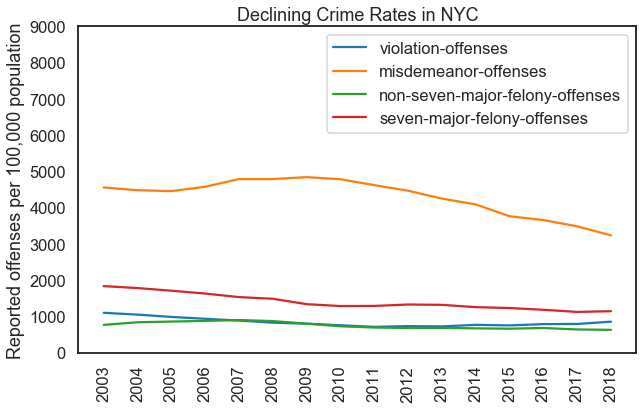

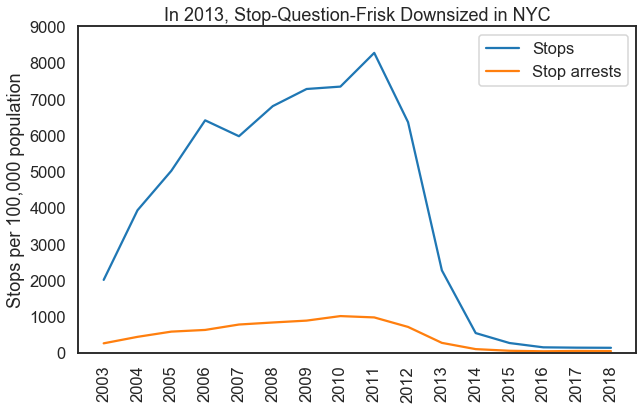

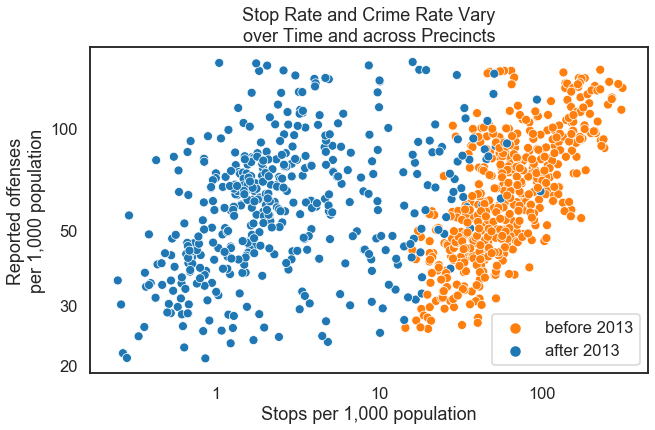

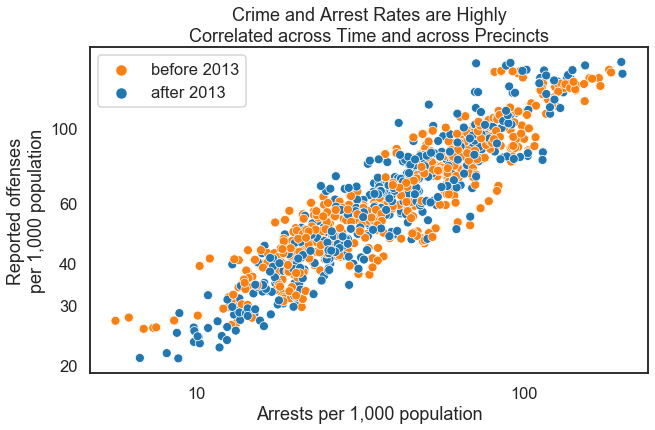

In [138]:
%matplotlib inline
%run visualizations.py

## Methodology

We first examine basic pairwise relationships between the features and the possible outcome variables. As we can see, there is extremely high correlation between complaints and arrests, and there is a very high correlation between stops and stop arrests. Other data is well correlated as well.

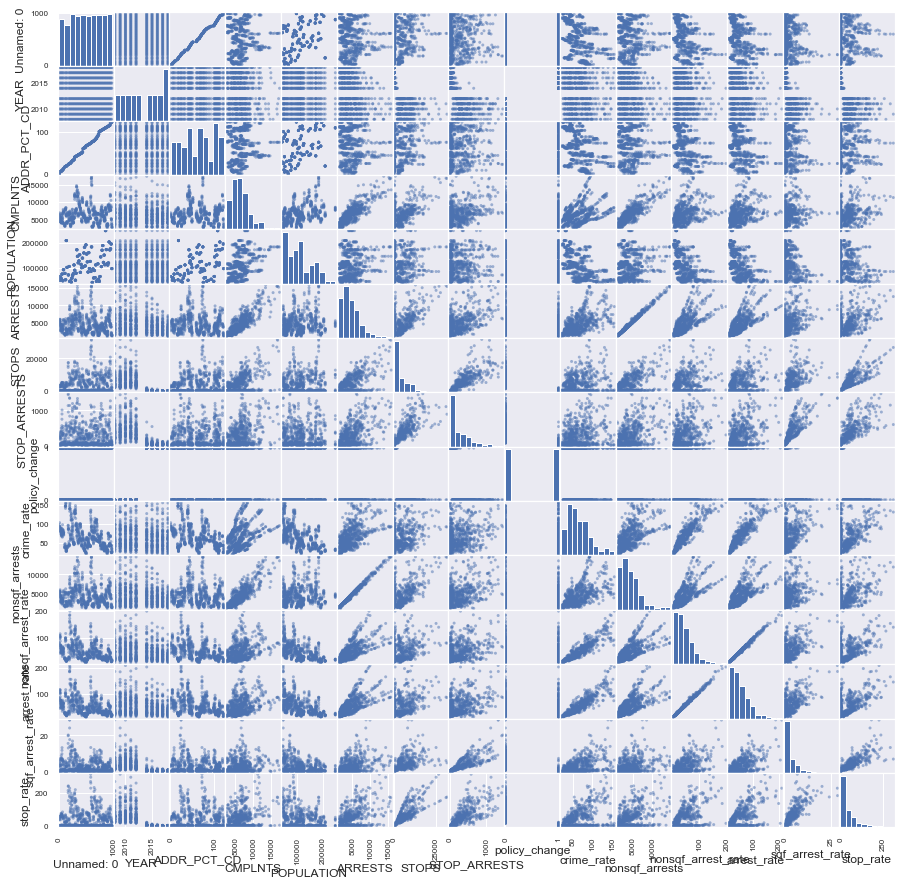

In [13]:
sns.set(rc={'figure.figsize':(15,15)})
pd.plotting.scatter_matrix(df);

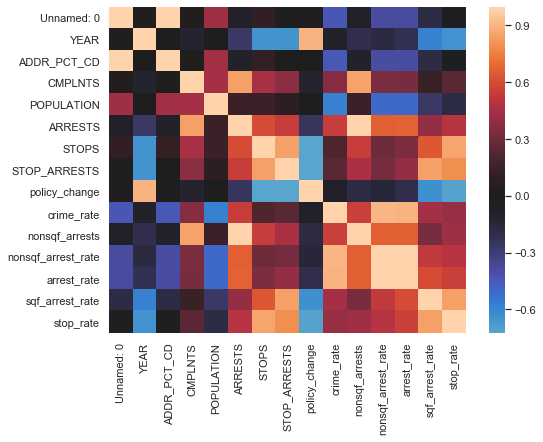

In [14]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df.corr(), center=0);

To start our training process, we split our data into the training and test samples, after stratifying by year. Then, we fit our linear regression model to the training sample, starting with the most basic specification where y is the number of arrests excluding arrests through stop-question-frisk and X contains stops. 

In [15]:
from sklearn.model_selection import train_test_split
feats = ['POPULATION', 'STOPS', 'CMPLNTS', 'crime_rate', 'stop_rate',\
         'YEAR','policy_change', 'sqf_arrest_rate', 'ADDR_PCT_CD']
X = df[feats].values
y = df[['nonsqf_arrests','nonsqf_arrest_rate','ARRESTS']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    stratify = X[:,5], \
                                                    test_size = 0.2, \
                                                    random_state = 120219)

In [23]:
import statsmodels.api as sm
import numpy as np
lr = sm.OLS(y_train[:,0], sm.add_constant(X_train[:,1]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     254.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           7.85e-48
Time:                        01:00:23   Log-Likelihood:                -5387.5
No. Observations:                 592   AIC:                         1.078e+04
Df Residuals:                     590   BIC:                         1.079e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3385.8467    113.190     29.913      0.000    3163.543    3608.150
x1             0.2711      0.017     15.940      0.000       0.238       0.305
==============================================================================
Omnibus:                      135.442   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.677
Skew:                           1.262   Prob(JB):                     2.26e-60
Kurtosis:                       5.182   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We next control for crime and population as both arrests and stops should be correlated with crime as well as population.

In [24]:
lr = sm.OLS(y_train[:,0], sm.add_constant(X_train[:,0:3]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          4.29e-236
Time:                        01:03:23   Log-Likelihood:                -4944.9
No. Observations:                 592   AIC:                             9898.
Df Residuals:                     588   BIC:                             9915.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.6413    126.216     -0.354      0.724    -292.531     203.248
x1            -0.0149      0.001    -15.417      0.000      -0.017      -0.013
x2             0.0823      0.009      9.024      0.000       0.064       0.100
x3             0.9008      0.020     44.914      0.000       0.861       0.940
==============================================================================
Omnibus:                       36.975   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.355
Skew:                           0.516   Prob(JB):                     1.16e-11
Kurtosis:                       3.988   Cond. No.                     3.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We also use an alternative specification with population rates. 

In [25]:
lr = sm.OLS(y_train[:,1], sm.add_constant(X_train[:,3:5]), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1728.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          3.51e-247
Time:                        01:06:15   Log-Likelihood:                -2316.6
No. Observations:                 592   AIC:                             4639.
Df Residuals:                     589   BIC:                             4652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8523      1.245    -13.541      0.000     -19.297     -14.408
x1             0.9179      0.019     48.830      0.000       0.881       0.955
x2             0.0916      0.010      9.137      0.000       0.072       0.111
==============================================================================
Omnibus:                       63.165   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.739
Skew:                           0.435   Prob(JB):                     3.53e-50
Kurtosis:                       5.911   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As rates help us get rid of the second warning about multicollinearity, we stick with this specification add policy and time trends. Among all specifications we fit, the one below with X including crime rate, stop rate, policy change, and stop rate * policy change interaction appears to work best in terms of R2 and multicollinearity. 

In [28]:
interaction = X_train[:,4]*X_train[:,6]
x = np.concatenate((x, interaction.reshape(-1,1)), axis = 1)
lr = sm.OLS(y_train[:,1], sm.add_constant(x), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     918.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          5.26e-251
Time:                        01:09:56   Log-Likelihood:                -2300.2
No. Observations:                 592   AIC:                             4610.
Df Residuals:                     587   BIC:                             4632.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.5832      1.459    -12.735      0.000     -21.449     -15.717
x1             0.8748      0.020     43.958      0.000       0.836       0.914
x2             0.1356      0.015      9.156      0.000       0.107       0.165
x3             2.4873      1.595      1.560      0.119      -0.644       5.619
x4             1.1185      0.245      4.573      0.000       0.638       1.599
==============================================================================
Omnibus:                       82.241   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.883
Skew:                           0.608   Prob(JB):                     4.15e-64
Kurtosis:                       6.218   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We test the specification above for multicollinearity and find that two of the terms have VIFs greater than 5. We drop the interaction variable, which improves the VIF scores.

In [32]:
feats8 = feats[3:5] + [feats[6]] + ['stops_policy_inter'] 
vif = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
list(zip(feats8, vif))

[('crime_rate', 2.8991444136528592),
 ('stop_rate', 6.652668638879886),
 ('policy_change', 3.42523406319445),
 ('stops_policy_inter', 6.128381844837023)]

In [33]:
x = np.concatenate((X_train[:,3:5], X_train[:,6].reshape(-1,1)), axis = 1)
lr = sm.OLS(y_train[:,1], sm.add_constant(x), hasconst=True)
rslt = lr.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1178.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          4.07e-248
Time:                        01:19:13   Log-Likelihood:                -2310.5
No. Observations:                 592   AIC:                             4629.
Df Residuals:                     588   BIC:                             4647.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6146      1.466    -13.380      0.000     -22.494     -16.735
x1             0.8953      0.020     45.403      0.000       0.857       0.934
x2             0.1309      0.015      8.711      0.000       0.101       0.160
x3             5.2322      1.502      3.483      0.001       2.282       8.182
==============================================================================
Omnibus:                       70.679   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.336
Skew:                           0.501   Prob(JB):                     1.32e-56
Kurtosis:                       6.071   Cond. No.                         344.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
feats7 = feats[3:5] + [feats[6]]
vif = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
list(zip(feats8, vif))

[('crime_rate', 6.246585794657547),
 ('stop_rate', 3.843999559724455),
 ('policy_change', 3.2645836354853452)]

The following contains all alternative specifications we fit onto our training sample. 

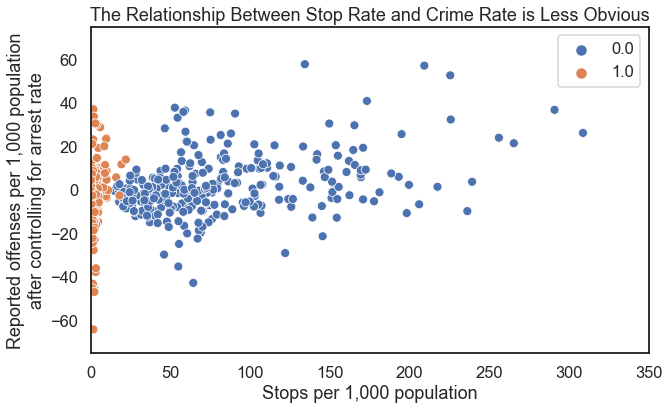

In [30]:
%run training.py

In [323]:
linreg.intercept_, linreg.coef_[0], linreg.score(X_train,y_train), linreg.score(X_test, y_test)

(-360.78659094890736,
 0.01831168471879306,
 0.8601905796684512,
 0.8071084449717738)

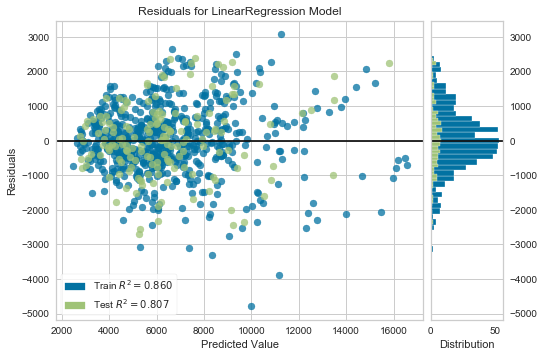

In [336]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Test Results and Conclusion
As the final step, we test our model with the test sample.

Text(0.5, 1.0, 'Linear Regression')

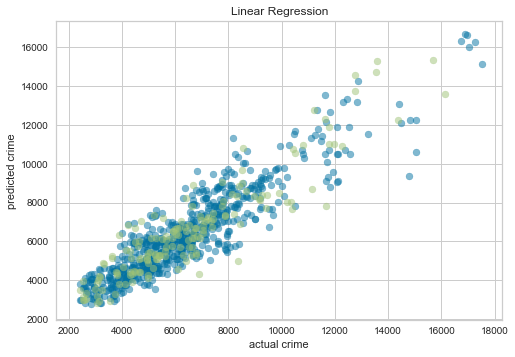

In [354]:
plt.scatter(y_train, linreg.predict(X_train), alpha=0.5)
plt.scatter(y_test, linreg.predict(X_test), alpha=0.5)
plt.xlabel('actual crime')
plt.ylabel('predicted crime')
plt.title('Linear Regression')

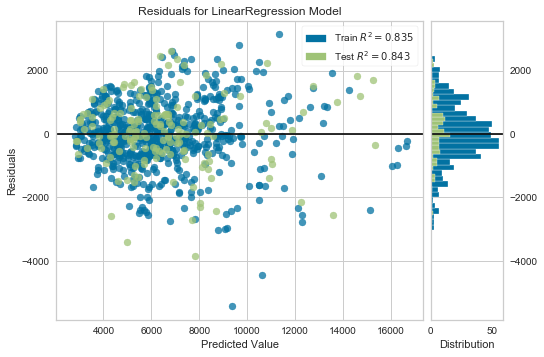

In [350]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

All in all, we find that stop rates have a positive relationship with the arrest rates, after arrests through stops are excluded.

## Future Research
The main avenue for future research is to make the leap to crime rates i.e. the question of whether stops have an impact on crime rates. However, to answer this question, one nee
How to include other factors underlying the crime rate
How to address the chicken-and-egg problem between crime and arrests
What would be a better model?
What would be a better dataset?
What can we uncover from individual-level data?
